In [1]:
import os 

import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from helpers import load_experiment

In [6]:
# baseline /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/18-14-45
# framework (simple) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/19-47-58
# framework /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/20-17-31
# framework (parallel) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/21-18-11
# baseline (sigmoid) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-12/06-58-58
# framework with pre-trianing: /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-12/12-19-17
# ultimate framework (no weights backbone, pre-train textual) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-13/09-57-08

dm, model = load_experiment("/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-13/09-57-08")

Global seed set to 42


Fetching configuration...
Loading datamodule...


/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(
100%|██████████| 2700/2700 [00:00<00:00, 9888.02it/s] 
/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Len of vocab:  53
Max len of caption:  12
Index for <pad>: [0]
Loading model


/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'criterion_task' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['criterion_task'])`.
  rank_zero_warn(
/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'criterion_tie' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['criterion_tie'])`.
  rank_zero_warn(


In [7]:
train_loader = dm.train_dataloader()
train_set = train_loader.dataset

100%|██████████| 1845/1845 [00:38<00:00, 47.88it/s]


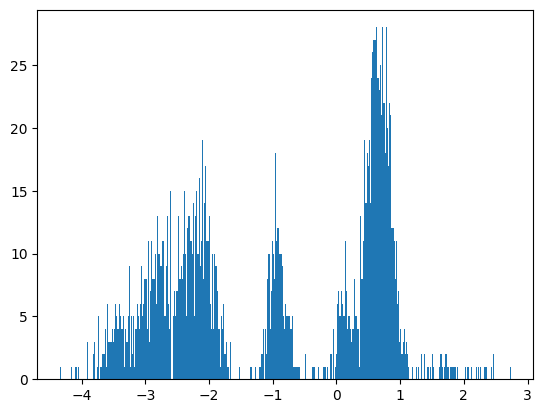

100%|██████████| 1845/1845 [00:38<00:00, 47.69it/s]


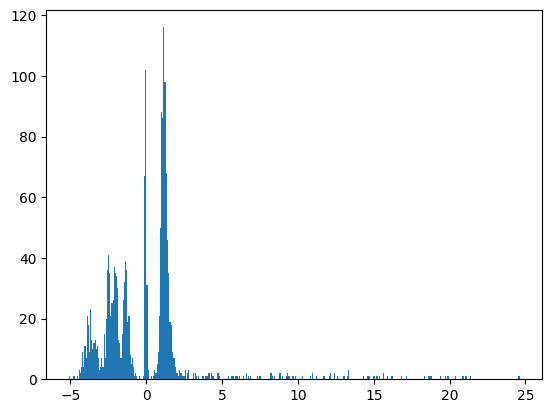

100%|██████████| 1845/1845 [00:38<00:00, 48.01it/s]


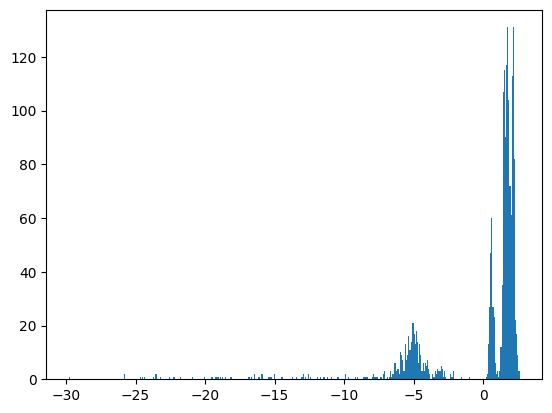

100%|██████████| 1845/1845 [00:38<00:00, 48.03it/s]


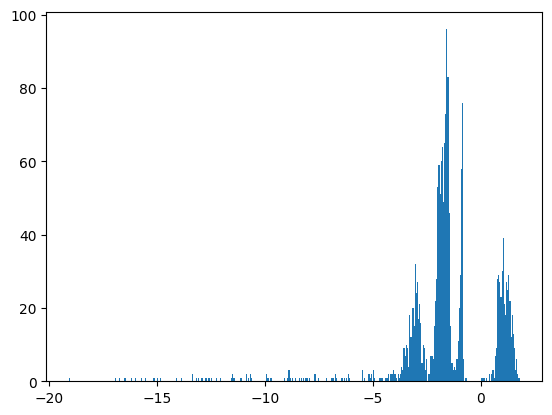

100%|██████████| 1845/1845 [00:38<00:00, 48.01it/s]


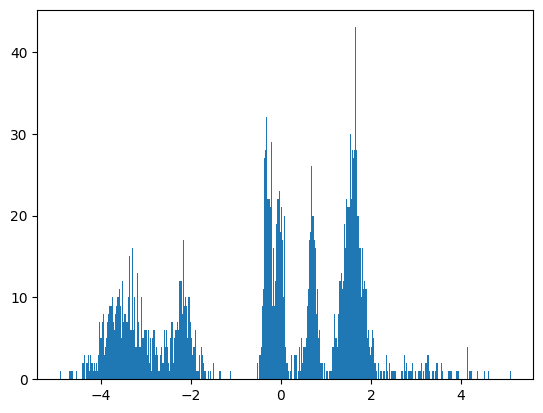

100%|██████████| 1845/1845 [00:39<00:00, 46.63it/s]


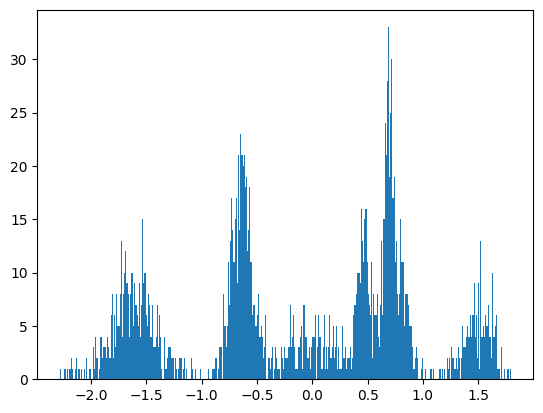

100%|██████████| 1845/1845 [00:39<00:00, 46.36it/s]


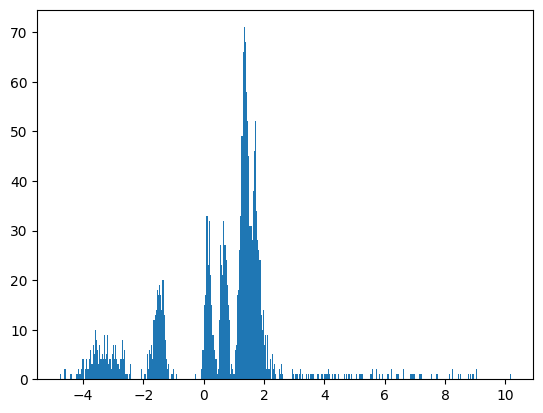

100%|██████████| 1845/1845 [00:39<00:00, 46.23it/s]


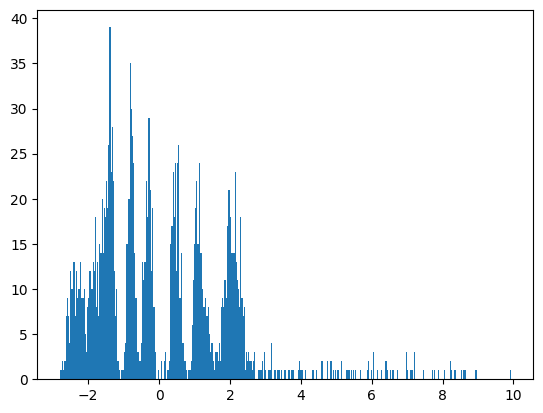

100%|██████████| 1845/1845 [00:39<00:00, 46.61it/s]


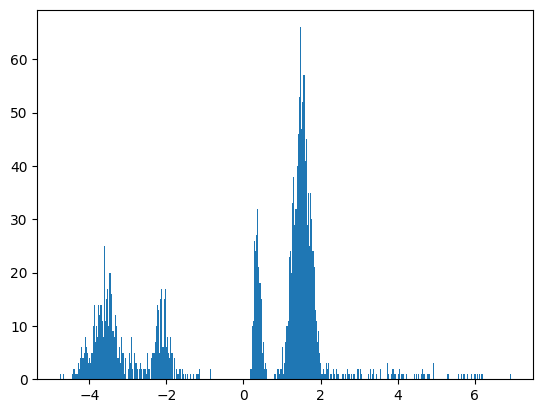

100%|██████████| 1845/1845 [00:39<00:00, 46.65it/s]


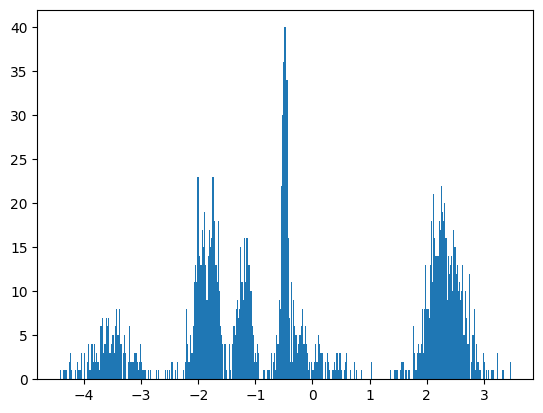

In [8]:
scores = list()
n_bins = 400

for feature_id in range(10):

    logits = list()

    for i in tqdm(range(len(train_set))):
        sample = train_set[i]

        image = sample["image"]
        image = image.unsqueeze(0).cuda()

        logit = model.main.inference(image)[2].cpu().detach().numpy()[0][feature_id]
        # logit = model(image)["concept_probs"].cpu().detach().numpy()[0][feature_id]

        logits.append(logit)
    
    logits = np.array(logits)
    plt.hist(logits, bins=n_bins)
    plt.show()

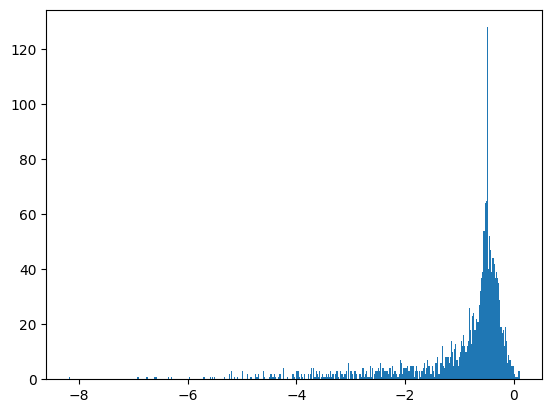

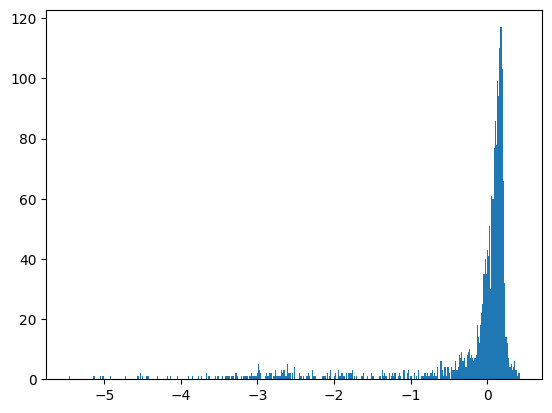

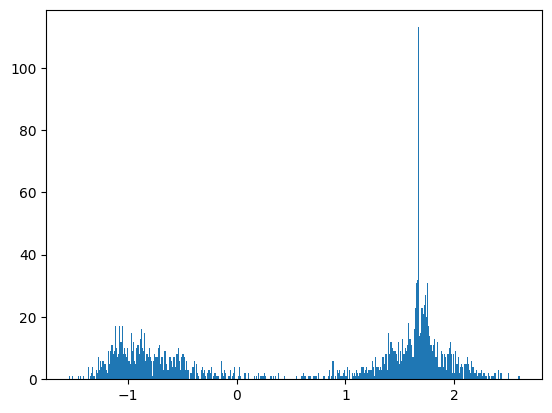

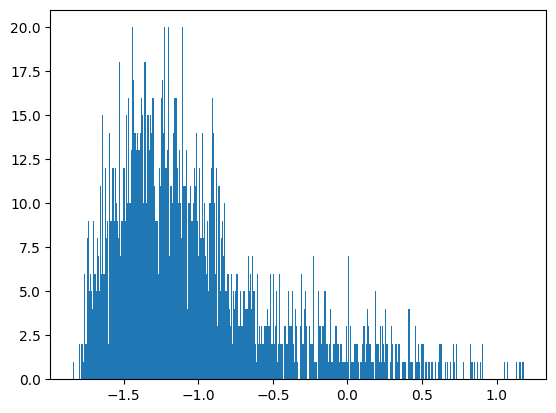

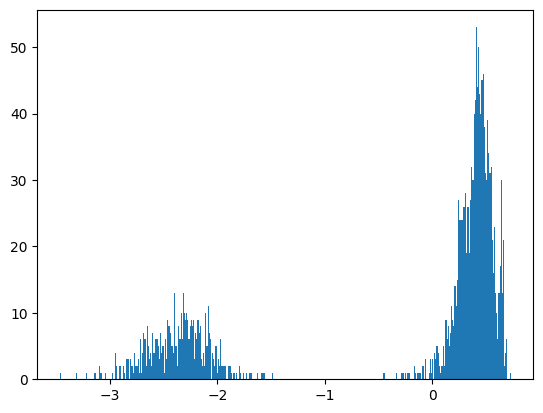

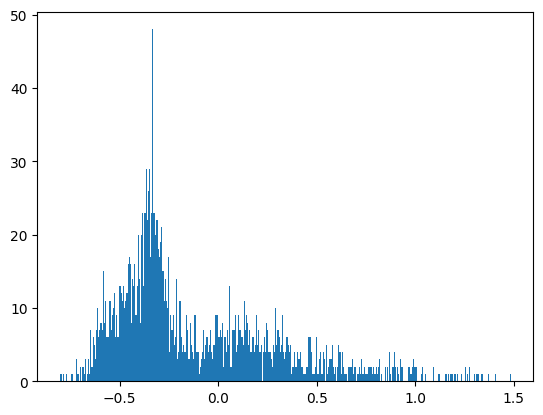

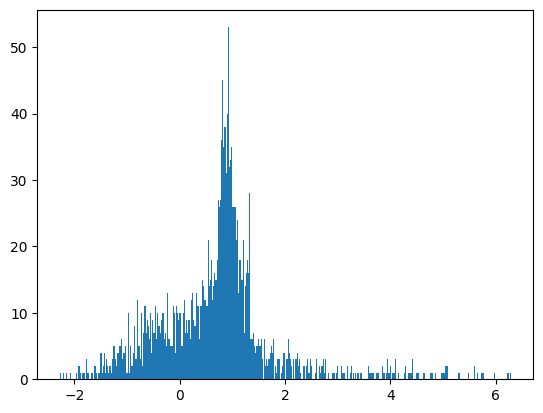

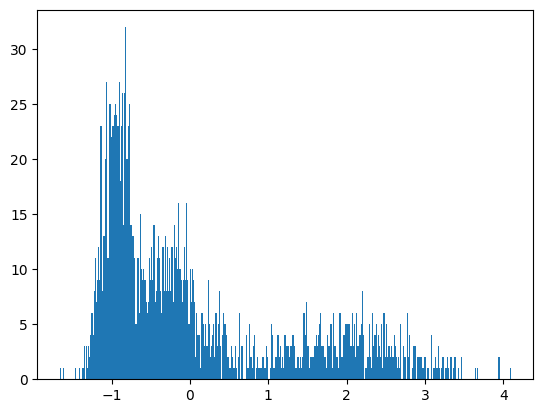

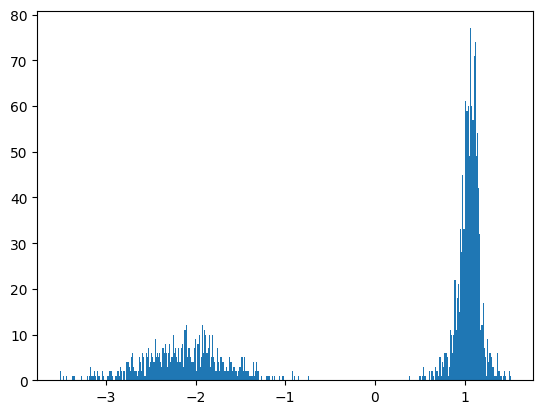

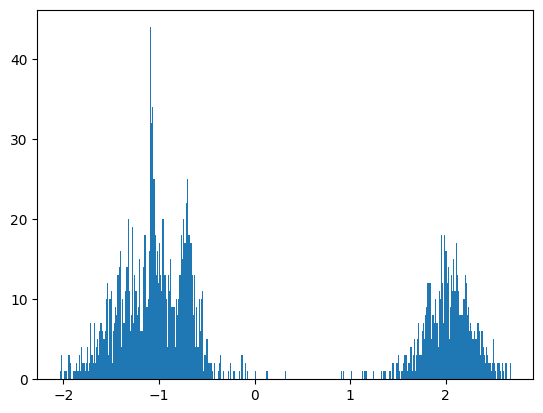

In [9]:
scores = list()
n_bins = 400

for feature_id in range(10):

    logits = list()

    for batch in train_loader:
        for i in range(batch["indices"].shape[0]):
            indices = batch["indices"][i].unsqueeze(0).cuda()
            logit = model.main.inference_textual(indices)[0].cpu().detach().numpy()[feature_id]
            logits.append(logit)
    
    logits = np.array(logits)
    plt.hist(logits, bins=n_bins)
    plt.show()